In [25]:
import pandas as pd
import numpy as np
from caits.loading import csv_loader_regression
from caits.dataset import RegressionDataset
from caits.transformers import FeatureExtractor, FunctionTransformer, FunctionTransformer2D, FeatureExtractor2D
from caits.preprocessing import normalize_signal
from caits.filtering import filter_butterworth
from caits.fe import median_value, std_value, spectrogram, melspectrogram, fft_frequencies, power_to_db
from sklearn.pipeline import Pipeline
from caits.visualization import plot_signal, plot_spectrogram

In [26]:
data = csv_loader_regression("../examples/data/AirQuality.csv", X_cols=["C6H6(GT)", "NOx(GT)"], y_cols=[ "PT08.S4(NO2)" ,"PT08.S1(CO)"], sep=";", decimal=",")

rgr_data = RegressionDataset(**data)
# rgr_data.y

rgr_data.X = [tmp.fillna(0) for tmp in rgr_data.X]
rgr_data.y = [tmp.fillna(0) for tmp in rgr_data.y]


In [27]:
normalize_tr = FunctionTransformer(normalize_signal)
butterworth_tr = FunctionTransformer(filter_butterworth, fs=100, filter_type="lowpass", cutoff_freq=0.5)
median_value_tr = FunctionTransformer(median_value)

test_pipeline = Pipeline([
    ("normalize", normalize_tr),
    ("butterworth", butterworth_tr),
])


In [28]:
transformed = test_pipeline.fit_transform(rgr_data)

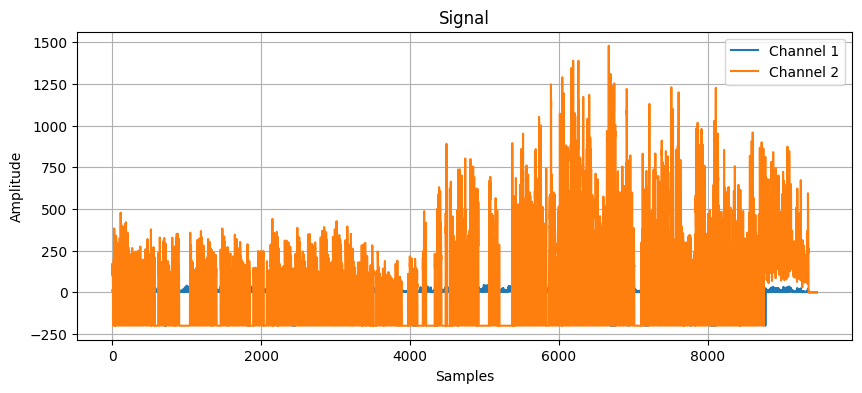

In [29]:
fig = plot_signal(rgr_data.to_numpy()[0])

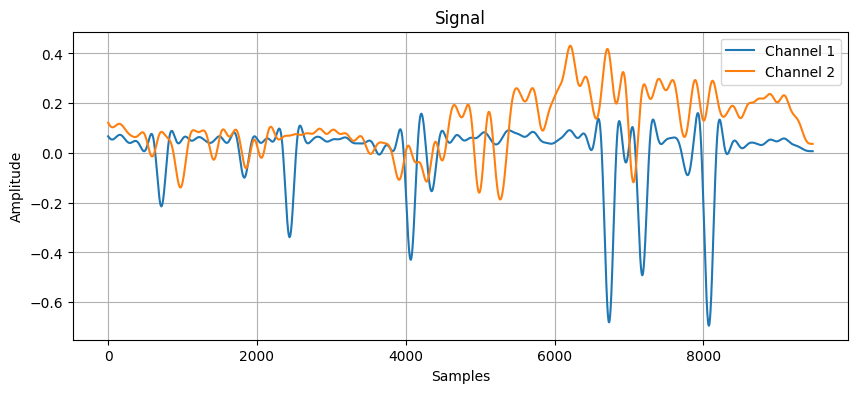

In [30]:
fig = plot_signal(transformed.to_numpy()[0])

In [31]:
rfe = FeatureExtractor([
    {
        "func": median_value,
        "params": {}
    },
    {
        "func": std_value,
        "params": {}
    }
])

In [32]:
rfe.fit_transform(rgr_data)

[               C6H6(GT)
median_value   7.800000
std_value     41.128716]
[               C6H6(GT)
median_value   7.800000
std_value     41.128716,                  NOx(GT)
median_value  139.000000
std_value     256.526027]


RegressionDataset with 2 instances

In [33]:
# spectrogram_tr = FunctionTransformer2D(func=spectrogram, n_fft=100, hop_length=10)
spectrogram_tr = FeatureExtractor2D(func=melspectrogram, n_fft=100, hop_length=10)
res = spectrogram_tr.fit_transform(rgr_data)

/home/kirk/PycharmProjects/crossai-ts/caits/fe/_spectrum.py:127: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = mel_filter(sr=sr, n_fft=n_fft, **kwargs)


In [34]:
f = fft_frequencies(sr=1, n_fft=255)
x = np.arange(res.X[0].shape[1])

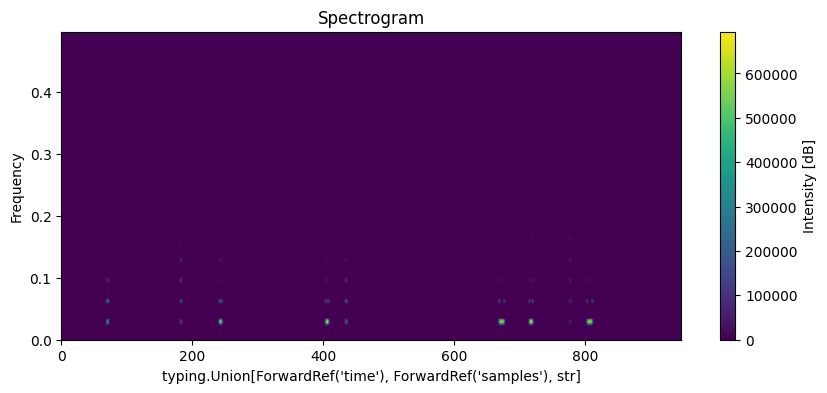

In [35]:
fig = plot_spectrogram(spec=res.X[0], x=x, f=f)

In [37]:
power_tr = FunctionTransformer2D(func=power_to_db)
power_res = power_tr.fit_transform(res)

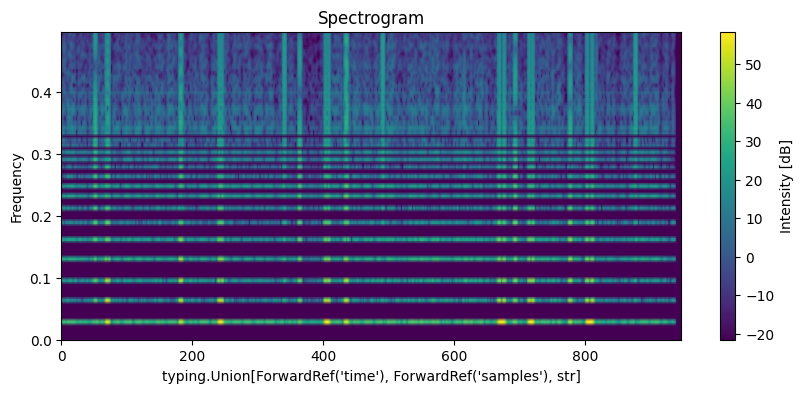

In [38]:
fig = plot_spectrogram(spec=power_res.X[0], x=x, f=f)